In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [17]:
df = pd.read_csv("depths.csv", header=0, names=["depth"])
print(df['depth'].mean())
non_damaged = pd.DataFrame({"depth": np.repeat(0, 2500)})

4.987416386399866


In [18]:
df = pd.concat([df, non_damaged], ignore_index=True)

In [19]:
df.describe()

,depth
count,10000.000000
mean,3.740562
std,3.297558
min,0.000000
25%,0.000083
50%,3.288691
75%,6.676061
max,9.999581


In [20]:
bins = [-np.inf, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#damage = ["0", "50_000", "80_000", "95_000", "105_000", "112_500", "120_000", "125_000", "130_000", "132_500", "134_000"]
damage = [0, 50_000, 80_000, 95_000, 105_000, 112_500, 120_000, 125_000, 130_000, 132_500, 134_000]
df['damage'] = pd.cut(df['depth'], bins=bins, labels=damage, right=True)
df['damage_amount'] = df['damage'].astype(float)
df['damage_label'] = df['damage'].astype(str)
df = df.sort_values(by=['damage'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 9999 to 5688
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   depth          10000 non-null  float64 
 1   damage         10000 non-null  category
 2   damage_amount  10000 non-null  float64 
 3   damage_label   10000 non-null  object  
dtypes: category(1), float64(2), object(1)
memory usage: 322.6+ KB


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '0'),
  Text(1, 0, '50000'),
  Text(2, 0, '80000'),
  Text(3, 0, '95000'),
  Text(4, 0, '105000'),
  Text(5, 0, '112500'),
  Text(6, 0, '120000'),
  Text(7, 0, '125000'),
  Text(8, 0, '130000'),
  Text(9, 0, '132500'),
  Text(10, 0, '134000')])

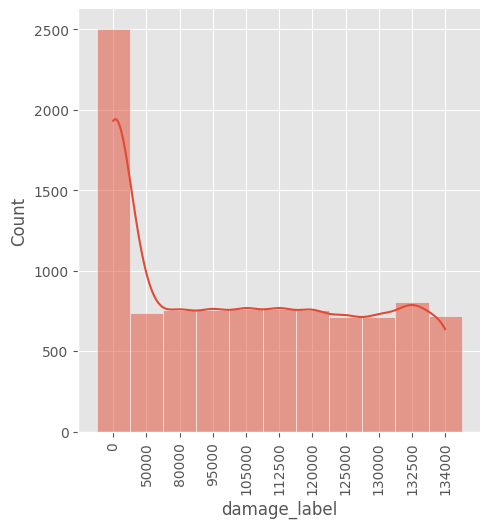

In [47]:
sns.displot(df['damage_label'], bins=11, kde=True)
plt.xticks(rotation=90)

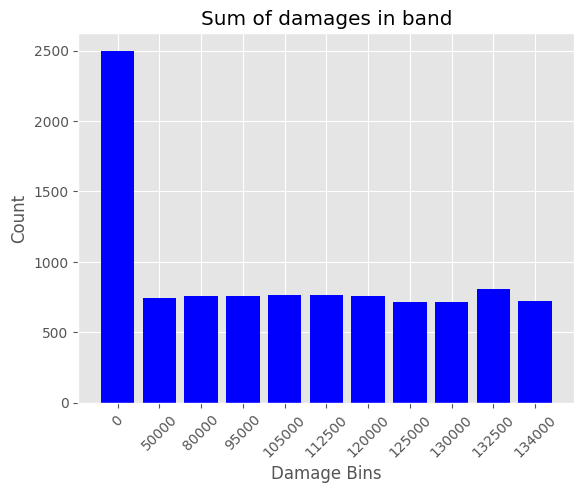

In [39]:
plt.style.use('ggplot')

x = damage
damage_value_counts = df['damage'].value_counts().sort_index()

x_pos = [i for i in range(0, 11)]

plt.bar(x_pos, damage_value_counts, color='blue')
plt.xlabel("Damage Bins")
plt.ylabel("Count")
plt.title("Sum of damages in band")

plt.xticks(x_pos, x, rotation=45)


plt.show()

In [8]:
df['damage'].value_counts().sort_index(ascending=True)

0         2500
50000      739
80000      757
95000      758
105000     765
112500     765
120000     759
125000     715
130000     714
132500     808
134000     720
Name: damage, dtype: int64

In [9]:
df['damage_label']

9999         0
8799         0
8798         0
8797         0
8796         0
         ...  
2243    134000
2239    134000
5371    134000
5314    134000
5688    134000
Name: damage_label, Length: 10000, dtype: object

In [11]:
df['damage_amount'].mean()

81272.25

In [ ]:
df['depth'].mean()